# Проект

## Шаг 1 

In [1]:
#импорт необходимых библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from scipy import stats
import seaborn as sns
from typing import List
from scipy.stats import shapiro
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import pandas as pdfrom 
from sklearn.compose import ColumnTransformer

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from time import time


from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


import warnings
warnings.filterwarnings(action='ignore')



RANDOM_STATE = 42
TEST_SIZE = 0.2


/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def create_boxplot_and_histogram(data, column):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # График ящика с усами
    sns.boxplot(x=data[column], ax=axes[0])
    axes[0].set_title(f'Ящик с усами для {column}')
    axes[0].set_xlabel(column)

    # Гистограмма
    num_bins = int(np.ceil(np.sqrt(len(data[column]))))
    sns.histplot(data=data, x=column, kde=True, bins=num_bins, ax=axes[1])
    axes[1].set_title(f'{column} - Частота распределения', fontsize=18)
    axes[1].set_xlabel(column, fontsize=14)
    axes[1].set_ylabel('Частота', fontsize=14)

    plt.show()

In [3]:
def create_barplot(data, column):
    """
    Input:
    - data (DataFrame): Исходный DataFrame с данными.
    - column (str): Название колонки, для которой нужно построить диаграмму.
    - title (str): Заголовок для столбчатой диаграммы.
    
    Output:
    None

    Description:
    Функция создает столбчатую диаграмму на основе данных из указанной колонки.
    """
    plt.figure(figsize=(10, 6))
    new_data = data[column].value_counts()
    df_new_data = new_data.reset_index()
    df_new_data.columns = [column, 'count']
    sns.barplot(x=column, y='count', data = df_new_data)
    plt.title(f'{column}.Плотность распределения')
    plt.xlabel(f'{column}')
    plt.ylabel(f'количество {column}')

In [4]:
def cat_num_col(df):
    """
    Input:
    - df(DataDrame): Исходный DataFrame с данными
    Output:
    - num_col_names(list) - список столбцов с количественными признаками
    - cat_col_names(list) - список столбцов с категориальными признаками

    Description:
    Функция возвращает списки с названиями столбцов категориальных и количественных признаков. id из списка удаляется

    """
    num_col_names = list(df.select_dtypes(include=['int64', 'float64']).columns)
    cat_col_names = list(df.select_dtypes(include=['object']).columns)
    #num_col_names.remove('id')
    return num_col_names, cat_col_names

In [5]:
try:
    df_auto = pd.read_csv('https://code.s3.yandex.net//datasets/autos.csv')
except FileNotFoundError:
    print('Что-то пошло не так')
    

In [6]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [7]:
df_auto.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [8]:
df_auto.columns = [col.lower() for col in df_auto.columns]


Удалим лишние признаки: столбцы datecrawled, datecreated, lastseen, numberofpictures, postalcode т.к. в них информации о самом автомобиле нет. Также удалим registrationmonth - не столь значимый параметр, который влияет на цену.

In [9]:
df_auto = df_auto.drop(
    ['datecrawled',
     'datecreated',
     'lastseen',
     'numberofpictures',
     'postalcode',
     'registrationmonth'],
    axis=1)

In [10]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   price             354369 non-null  int64 
 1   vehicletype       316879 non-null  object
 2   registrationyear  354369 non-null  int64 
 3   gearbox           334536 non-null  object
 4   power             354369 non-null  int64 
 5   model             334664 non-null  object
 6   kilometer         354369 non-null  int64 
 7   fueltype          321474 non-null  object
 8   brand             354369 non-null  object
 9   repaired          283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


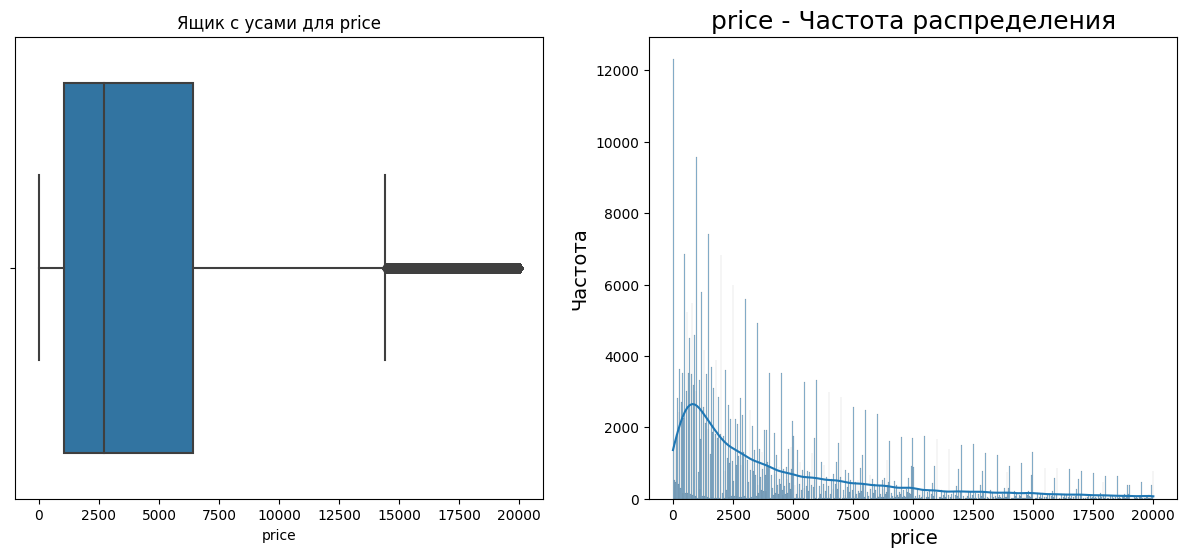

In [11]:
create_boxplot_and_histogram(df_auto, 'price')

In [12]:
df_auto['price'].describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

In [13]:
df_auto = df_auto.query('price >= 100')

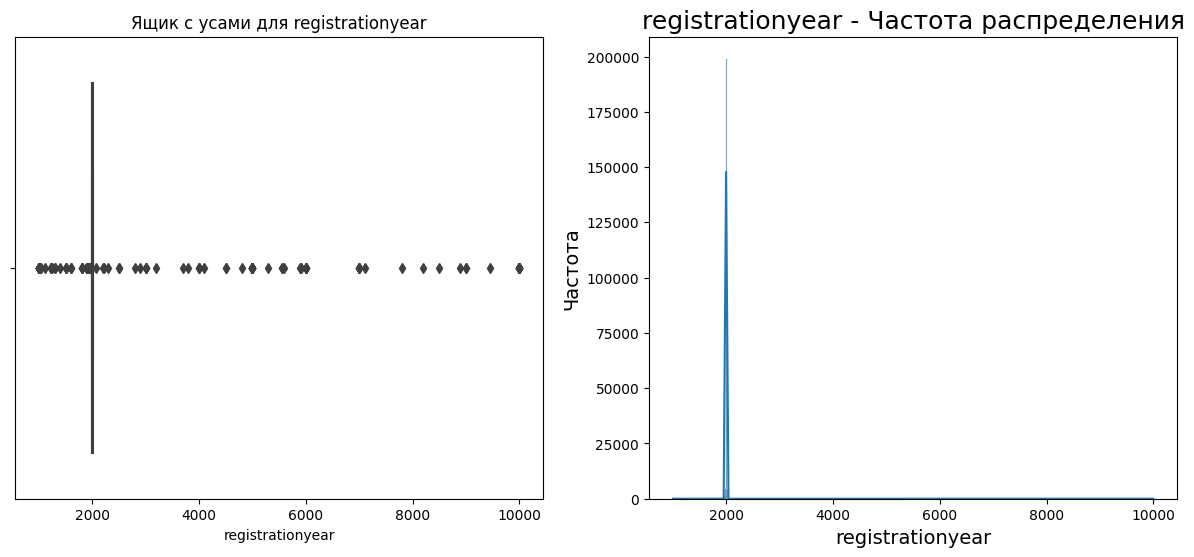

In [14]:
create_boxplot_and_histogram(df_auto, 'registrationyear')

In [15]:
df_auto['registrationyear'].describe()

count    341055.000000
mean       2003.955303
std          69.811742
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registrationyear, dtype: float64

In [16]:
df_auto = df_auto.query('1990 <= registrationyear <= 2023')

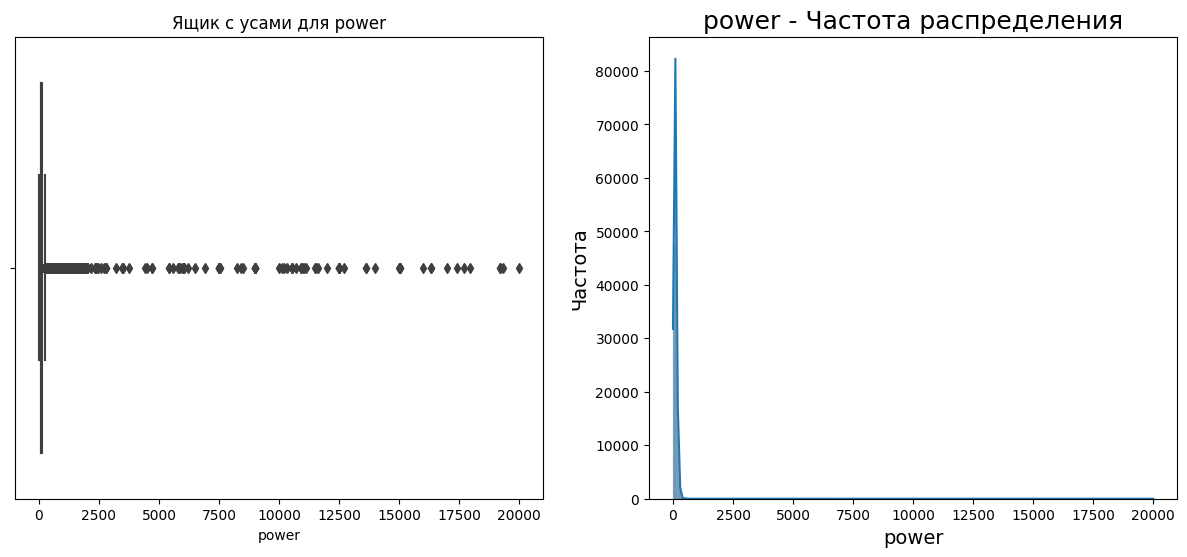

In [17]:
create_boxplot_and_histogram(df_auto, 'power')

https://vc.ru/u/1729144-agent-motors/674325-30-superkarov-giperkarov-i-elektromobiley-moshchnostyu-bolee-1-000-loshadinyh-sil


In [18]:
df_auto= df_auto.query('90< power <= 1000')

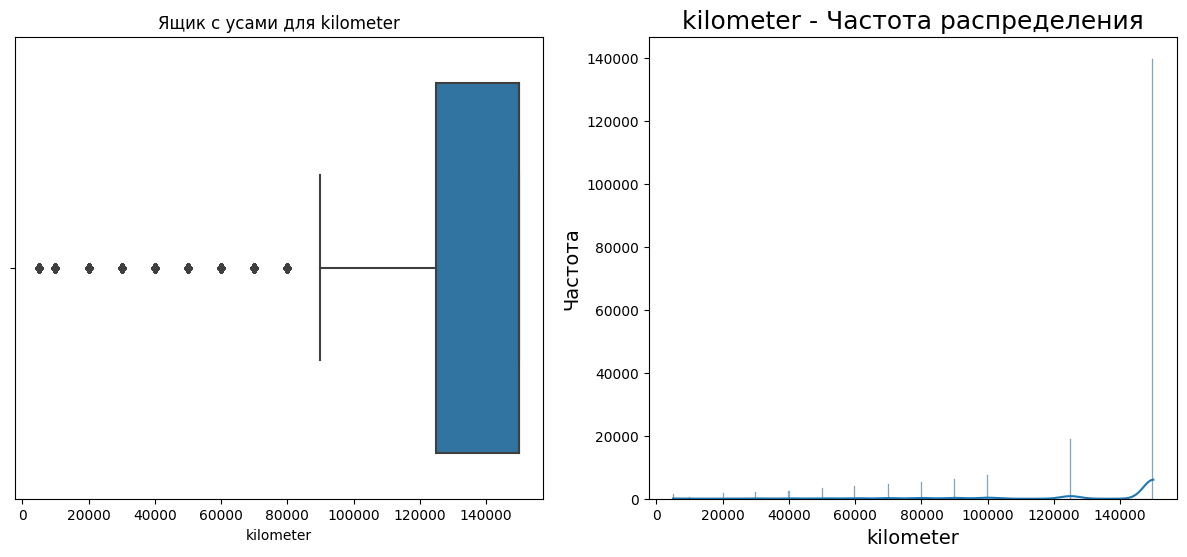

In [19]:
create_boxplot_and_histogram(df_auto, 'kilometer')

In [20]:
df_auto.isna().sum().sort_values()/df_auto.shape[0]*100

price                0.000000
registrationyear     0.000000
power                0.000000
kilometer            0.000000
brand                0.000000
gearbox              1.342553
model                3.591759
fueltype             5.544977
vehicletype          5.766210
repaired            13.338654
dtype: float64

In [21]:
df_auto['repaired'] = df_auto['repaired'].fillna('no')

In [22]:
dupl = df_auto.duplicated().sum()
print(f'Количество дублей: {dupl}')
if dupl > 0:
    df_auto.drop_duplicates(inplace=True)

Количество дублей: 27653


## Модель

In [23]:
df_auto.head()

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,no


In [24]:
target = df_auto['price']
matrix = df_auto.drop('price', axis=1)

matrix_train, matrix_test, target_train, target_test = train_test_split(
    matrix, target,
    random_state=RANDOM_STATE,
    test_size=TEST_SIZE
)

num_matrix, cat_matrix = cat_num_col(matrix)

matrix_train[cat_matrix] = matrix_train[cat_matrix].astype('category')

matrix_test[cat_matrix] = matrix_test[cat_matrix].astype('category')

In [25]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])


numeric_pipe = Pipeline(steps=[
    ('scaler', RobustScaler())
])

data_preprocessor = ColumnTransformer(transformers=[
    ('ohe', ohe_pipe, cat_matrix),
    ('num', numeric_pipe, num_matrix)
], remainder='passthrough')



In [26]:
def evaluate_pipeline(pipeline, param_grid, X_train, y_train, X_test, y_test):
    start_time = time()
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    end_time = time()
    execution_time = end_time - start_time
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    rmse = np.sqrt(abs(grid_search.best_score_))

    start_prediction_time = time()
    predictions = best_model.predict(X_test)
    end_prediction_time = time()
    prediction_time = end_prediction_time - start_prediction_time
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions))

    return best_params, execution_time, rmse, prediction_time, rmse_test

In [28]:
pipeline_tree = Pipeline([
    ('preprocessor', data_preprocessor),
    ("decision_tree", DecisionTreeRegressor())
])

# Определение параметров для поиска
param_grid_tree = {
    'decision_tree__max_depth': [3, 5, 7],
    'decision_tree__min_samples_split': [2, 3, 4],
    'decision_tree__min_samples_leaf': [1, 2, 3]
}

grid_search = RandomizedSearchCV(pipeline_tree, param_grid_tree, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
start_time = time()
grid_search.fit(matrix_train, target_train)
end_learn = time()

learn_time = end_learn - start_time #время поиска лучшей модели

rmse_catboost = np.sqrt(abs(grid_search.best_score_))

print('Время поиска лучшей модели:', round(learn_time, 2), 'сек.')
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший RMSE:", rmse_catboost)


/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for t

Время поиска лучшей модели: 87.15 сек.
Лучшие параметры: {'decision_tree__min_samples_split': 2, 'decision_tree__min_samples_leaf': 2, 'decision_tree__max_depth': 7}
Лучший RMSE: 2456.0890411590185


In [29]:
pipeline_catboost = Pipeline([
    ('preprocessor', data_preprocessor),
    ("catboost", CatBoostRegressor(loss_function='RMSE', verbose=25))
])

param_grid_catboost = {
    'catboost__iterations': [50, 100, 150]
}


best_params_catboost, execution_time_catboost, rmse_catboost,  predictions_time_catboost, rmse_test_catboost = \
evaluate_pipeline(pipeline_catboost, param_grid_catboost, matrix_train, target_train, matrix_test, target_test)



Learning rate set to 0.5
0:	learn: 3601.9104812	total: 76.4ms	remaining: 3.74s
25:	learn: 2009.0838529	total: 216ms	remaining: 199ms
49:	learn: 1911.3367147	total: 344ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3556.3304665	total: 11.8ms	remaining: 581ms
25:	learn: 2004.6081807	total: 170ms	remaining: 157ms
49:	learn: 1894.8298005	total: 322ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3548.7243758	total: 7.68ms	remaining: 376ms
25:	learn: 1996.2341732	total: 185ms	remaining: 171ms
49:	learn: 1895.5570297	total: 337ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3554.1290252	total: 5.67ms	remaining: 278ms
25:	learn: 2004.4753774	total: 138ms	remaining: 128ms
49:	learn: 1903.5818429	total: 270ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3529.4728901	total: 5.09ms	remaining: 249ms
25:	learn: 1986.1048080	total: 129ms	remaining: 119ms
49:	learn: 1889.1429212	total: 249ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3601.9104812	total: 4.65ms	remaining: 46

In [ ]:
pipeline_lgbm = Pipeline([
    ('preprocessor', data_preprocessor),
    ("lgbm", LGBMRegressor(force_row_wise=True))
])

param_grid_lgbm = {
    'lgbm__learning_rate': [0.005, 0.05]
}

best_params_lgbm, execution_time_lgbm, rmse_lbdm, predictions_time_lgbm, rmse_test_lgbm  = \
evaluate_pipeline(pipeline_lgbm, param_grid_lgbm, matrix_train, target_train, matrix_test, target_test)


[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 109009, number of used features: 249
[LightGBM] [Info] Start training from score 6125.864846


In [ ]:
data = {
    "model": ['linear', 'tree', 'catboost', 'lgbm'],
    "execution_time": [execution_time_linear, execution_time_tree, execution_time_catboost, execution_time_lgbm],
    "train_rmse": [rmse_linear, rmse_tree, rmse_test_catboost, rmse_test_lgbm],
    "test_rmse": [rmse_test_linear, rmse_test_tree, rmse_test_catboost, rmse_test_lgbm],
    "train_prediction_time": [execution_time_linear, execution_time_tree, execution_time_catboost, execution_time_lgbm],
    "test_prediction_time": [prediction_time_linear, predictions_time_tree, predictions_time_catboost, predictions_time_lgbm]
}

df_all_model = pd.DataFrame(data)

df_all_model.head()
